In [1]:
from JDOS_model import JDOS
from scipy.signal import savgol_filter
from pandas import read_csv
from numpy import array
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

In [2]:
input_data = read_csv('PbTiO3.csv', sep=';')

last_index = 200
first_index = 15

e1 = array(input_data['e1'][last_index:first_index:-1])
e2 = array(input_data['e2'][last_index:first_index:-1])
eV = array(input_data['eV'][last_index:first_index:-1])

#e1_second_der = (UnivariateSpline(eV, e1, s=0)).derivative(2)(eV)
#e2_second_der = (UnivariateSpline(eV, e2, s=0)).derivative(2)(eV)

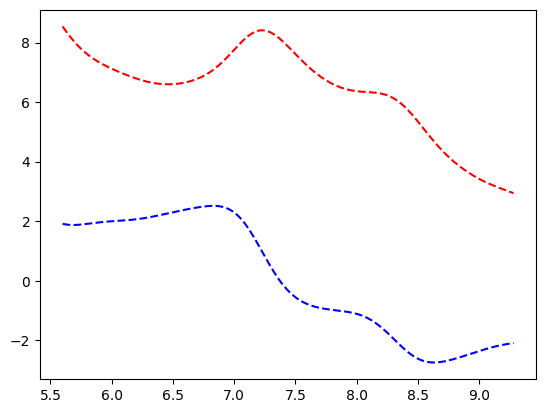

In [3]:
eV = savgol_filter(eV, 8, 2)
e1 = savgol_filter(e1, 8, 2)
e2 = savgol_filter(e2, 8, 2)
plt.plot(eV, e1, 'b--', eV, e2, 'r--')
plt.show()

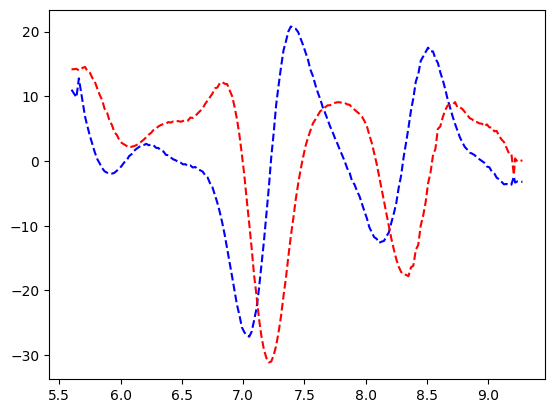

In [4]:
e1_second_der = (UnivariateSpline(eV, e1, s=0)).derivative(2)(eV)
e2_second_der = (UnivariateSpline(eV, e2, s=0)).derivative(2)(eV)
plt.plot(eV, e1_second_der, 'b--', eV, e2_second_der, 'r--')
plt.show()

In [5]:
jdos = JDOS()

/home/jbozek/.local/lib/python3.10/site-packages/scipy/optimize/_differentialevolution.py:387: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  with DifferentialEvolutionSolver(func, bounds, args=args,


It took: 258.4951024830002
Result: [0.13656363875554067, -0.18336084514847306, 0.45837033340637046, 0.033814434379286884, 0.06827444766940494, 6.787592616126917, 3.049700056487186, 4.441077805765847, 5.952826477275547, 16.996419499437387, 8.348487630345492, 7.199547267530442, 6.216676478817514, 7.4016895381899985, 5.503793399226279, 0.24864221322469504, 0.29244781687243826, 2.984930618108438, 2.711881894766374, 0.2663791475635646, -0.8997028140873975, 2.36399632096422, -0.42175730152442176, 0.8671135968967291, 1.7718271864097466]
m: [0.13656363875554067, -0.18336084514847306, 0.45837033340637046, 0.033814434379286884, 0.06827444766940494]
A: [6.787592616126917, 3.049700056487186, 4.441077805765847, 5.952826477275547, 16.996419499437387]
E_ck: [8.348487630345492, 7.199547267530442, 6.216676478817514, 7.4016895381899985, 5.503793399226279]
gamma: [0.24864221322469504, 0.29244781687243826, 2.984930618108438, 2.711881894766374, 0.2663791475635646]
phi: [-0.8997028140873975, 2.3639963209642

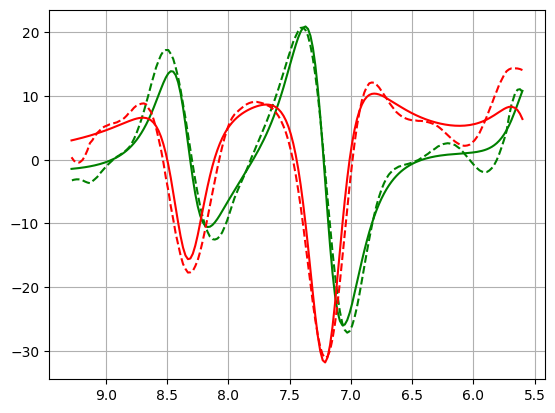

In [10]:
jdos.fitting_method(filepath='PbTiO3.csv',
                    left=200,
                    right=15,
                    model_order=5,
                    filter_data=True,
                    plot=True,
                    discrete_m=False,
                    threads=8,
                    window_length=8,
                    poly_order=2)

/home/jbozek/.local/lib/python3.10/site-packages/scipy/optimize/_differentialevolution.py:387: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  with DifferentialEvolutionSolver(func, bounds, args=args,


It took: 264.9487216069999
Result: [0.11999421752326844, 0.2546870936999748, -0.454870264313332, -0.47823280780901745, -0.21572897035675975, 0.8120274830803769, 0.47965686104679267, 0.4896431286974241, 0.8921944142036977, 12.213031959992223, 5.456573750888411, 8.38724505733344, 8.179885514440825, 7.150017673201841, 5.008515632936637, 0.23157369384500956, 0.38016627669612063, 1.0130982931413688, 0.3634766429148497, 4.17315960623525, 1.754154208203521, -1.1326346360772963, 0.7664350161121927, -0.10614069047647016, -0.37119802636356297]
m: [0.11999421752326844, 0.2546870936999748, -0.454870264313332, -0.47823280780901745, -0.21572897035675975]
A: [0.8120274830803769, 0.47965686104679267, 0.4896431286974241, 0.8921944142036977, 12.213031959992223]
E_ck: [5.456573750888411, 8.38724505733344, 8.179885514440825, 7.150017673201841, 5.008515632936637]
gamma: [0.23157369384500956, 0.38016627669612063, 1.0130982931413688, 0.3634766429148497, 4.17315960623525]
phi: [1.754154208203521, -1.132634636

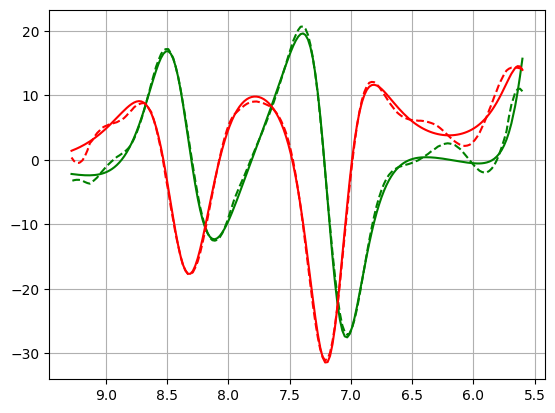

In [14]:
jdos.fitting_method(filepath='PbTiO3.csv',
                    left=200,
                    right=15,
                    model_order=5,
                    filter_data=True,
                    plot=True,
                    discrete_m=True,
                    threads=8,
                    window_length=8,
                    poly_order=2)

It took: 57.791884994000156
Result: [0.48416524456737997, -0.4897475496460427, 0.06610931913814144, 2.3587748450980417, 0.9484880264058386, 12.66950607604347, 5.424348580953001, 7.200163901024224, 8.377521414826175, 0.15444490611137152, 0.3517932534428452, 0.2533521383879691, -1.2939802905587197, -0.26422036543210775, -1.0173367327221456]
m: [0.48416524456737997, -0.4897475496460427, 0.06610931913814144]
A: [2.3587748450980417, 0.9484880264058386, 12.66950607604347]
E_ck: [5.424348580953001, 7.200163901024224, 8.377521414826175]
gamma: [0.15444490611137152, 0.3517932534428452, 0.2533521383879691]
phi: [-1.2939802905587197, -0.26422036543210775, -1.0173367327221456]
Fitness value(max 0): 2.0299881191754747



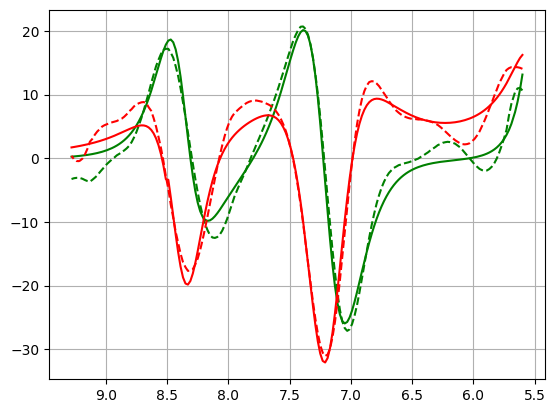

It took: 2.200001435000104
Result: [-0.28515035439115677, 0.23468430963103715, -0.17001224831674555, 4.682959042654512, 9.593846723384173, 5.808604939723418, 10.582551419917511, 9.715776336623225, 8.55213928518405, 6.0020714296053574, 4.4640214485870695, 0.2201443047084375, -2.6917237716890785, -2.188949202999077, -1.4514748849622643]
m: [-0.28515035439115677, 0.23468430963103715, -0.17001224831674555]
A: [4.682959042654512, 9.593846723384173, 5.808604939723418]
E_ck: [10.582551419917511, 9.715776336623225, 8.55213928518405]
gamma: [6.0020714296053574, 4.4640214485870695, 0.2201443047084375]
phi: [-2.6917237716890785, -2.188949202999077, -1.4514748849622643]
Fitness value(max 0): 9.621001369527647



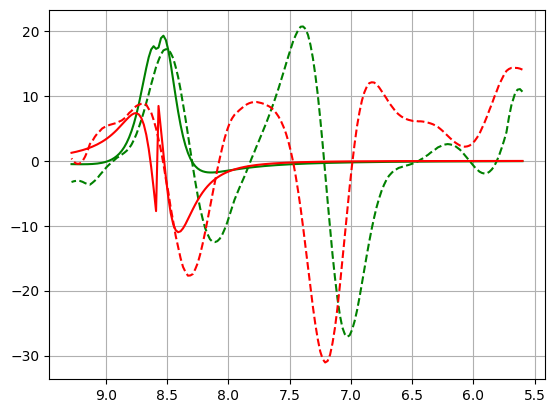

It took: 93.91846071200007
Result: [-0.3221696563926466, 0.07570276192180903, -0.07537982472472948, 0.07167994460848481, 1.4961473223944601, 1.8296686988122204, 12.735330205017782, 10.708379963040906, 7.1894775500343275, 3.924537844711331, 5.404925112738255, 8.3583579389839, 0.34115680645537605, 2.9629393557150436, 0.18236759009405024, 0.29757154748881653, -0.3501205066402984, 2.0212239819344164, 1.7373838861082855, 2.166716288872991]
m: [-0.3221696563926466, 0.07570276192180903, -0.07537982472472948, 0.07167994460848481]
A: [1.4961473223944601, 1.8296686988122204, 12.735330205017782, 10.708379963040906]
E_ck: [7.1894775500343275, 3.924537844711331, 5.404925112738255, 8.3583579389839]
gamma: [0.34115680645537605, 2.9629393557150436, 0.18236759009405024, 0.29757154748881653]
phi: [-0.3501205066402984, 2.0212239819344164, 1.7373838861082855, 2.166716288872991]
Fitness value(max 0): 2.1249788971454673



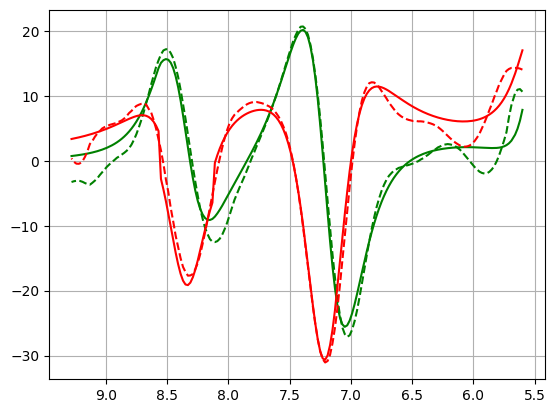

It took: 96.31688918999998
Result: [-0.08403613593326677, 0.17376875719681187, -0.5, -0.06184911071583849, 8.745491224004773, 15.582275478814124, 0.921451587686777, 7.884768480830019, 8.366680878856698, 9.755609164581024, 7.188196072877545, 5.132075116154887, 0.28039297424672577, 6.421138437685332, 0.35064981502529496, 0.1309961458201605, 2.112829826529039, -1.5968625164820065, -0.22937647420010374, -0.8702204886200888]
m: [-0.08403613593326677, 0.17376875719681187, -0.5, -0.06184911071583849]
A: [8.745491224004773, 15.582275478814124, 0.921451587686777, 7.884768480830019]
E_ck: [8.366680878856698, 9.755609164581024, 7.188196072877545, 5.132075116154887]
gamma: [0.28039297424672577, 6.421138437685332, 0.35064981502529496, 0.1309961458201605]
phi: [2.112829826529039, -1.5968625164820065, -0.22937647420010374, -0.8702204886200888]
Fitness value(max 0): 1.8950218127936729



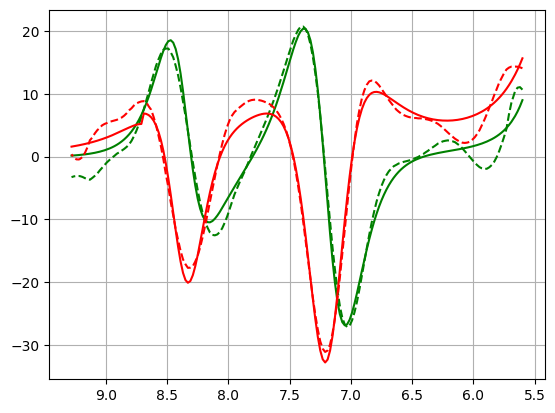

It took: 147.76791827299985
Result: [-0.4395992072061947, -0.012491776895084905, -0.11648432660204028, 0.05623792107449621, 0.2270029817127175, 15.493225785602235, 18.93939507609479, 5.872937127177423, 5.252387500978232, 3.1295685722970976, 10.316747401927472, 7.613433243025927, 8.320764346839706, 5.359317174970368, 7.180966447103551, 6.546706329279455, 2.3570995856090327, 0.30804388102937796, 1.5016132247891556, 0.22961156906061486, 1.3036304918619166, 0.9929728241979943, 2.2373543211094784, 1.3139961380352287, -0.5448301180562559]
m: [-0.4395992072061947, -0.012491776895084905, -0.11648432660204028, 0.05623792107449621, 0.2270029817127175]
A: [15.493225785602235, 18.93939507609479, 5.872937127177423, 5.252387500978232, 3.1295685722970976]
E_ck: [10.316747401927472, 7.613433243025927, 8.320764346839706, 5.359317174970368, 7.180966447103551]
gamma: [6.546706329279455, 2.3570995856090327, 0.30804388102937796, 1.5016132247891556, 0.22961156906061486]
phi: [1.3036304918619166, 0.992972824

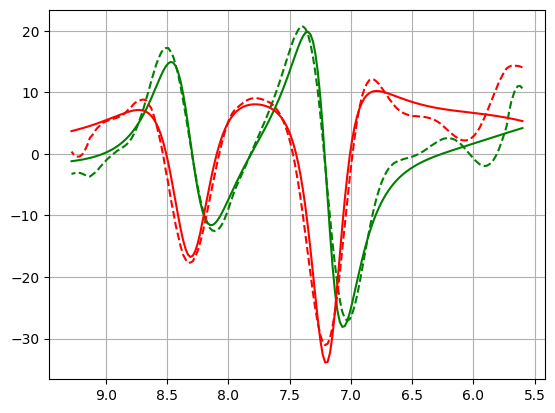

It took: 138.84391736999987
Result: [-0.3868935917795516, 0.19692442392094145, 0.06844050057935547, 0.09043454743896318, 0.07784908820091607, 9.672757169442493, 2.2293403151988667, 8.87685344406037, 7.938299276241174, 11.10772380783724, 5.55089127464468, 5.04964794865734, 7.1682342286017, 8.307705938796556, 5.417081544491488, 5.0930534997226555, 0.8370023965160298, 0.2716179090594215, 0.30059166962462225, 0.10902009953753389, 3.128458270539514, -0.6800523416798651, 2.4489574698412224, 2.2504222529746176, -1.2226618641212796]
m: [-0.3868935917795516, 0.19692442392094145, 0.06844050057935547, 0.09043454743896318, 0.07784908820091607]
A: [9.672757169442493, 2.2293403151988667, 8.87685344406037, 7.938299276241174, 11.10772380783724]
E_ck: [5.55089127464468, 5.04964794865734, 7.1682342286017, 8.307705938796556, 5.417081544491488]
gamma: [5.0930534997226555, 0.8370023965160298, 0.2716179090594215, 0.30059166962462225, 0.10902009953753389]
phi: [3.128458270539514, -0.6800523416798651, 2.44895

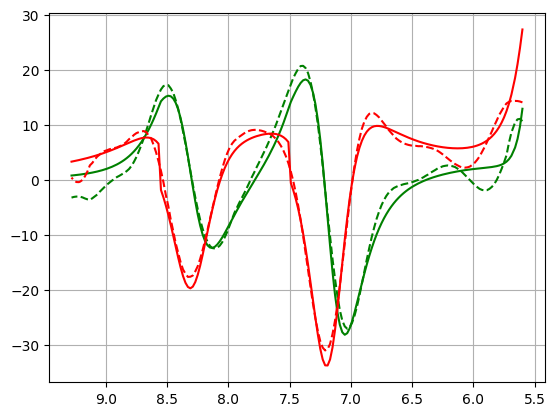

dAIC: {3: 0.0, 4: 1021.2158396239361, 5: 1060.5360315774337}

dBIC: {3: 0.0, 4: 937.006140218731, 5: 978.8363927606836}



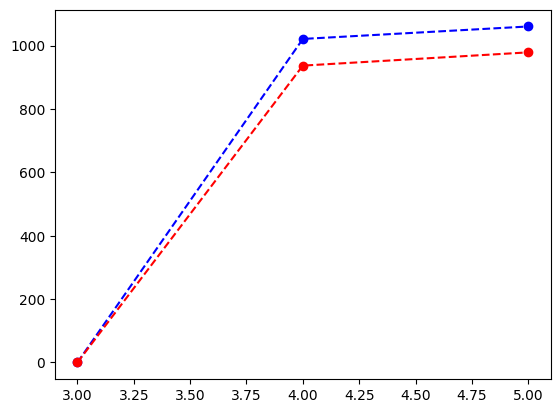

In [9]:
jdos.compare_model_order(
                        order_bounds=[3,6],
                        tests_per_order=2,
                        filepath='PbTiO3.csv',
                        left=200,
                        right=15,
                        filter_data=True,
                        plot=True,
                        discrete_m=False,
                        threads=8)